In [1]:
# Lucas Fernando da Silva
# RA: 2209462

In [2]:
# Imports
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew
from sklearn.model_selection import KFold
from sklearn import svm

%matplotlib inline

# Engenharia de Dados:

In [3]:
#Import dos dados
dataset = pd.read_csv('C:/Users/lucas/Projetos Embarcados Com Ciencia de Dados/PROJETO_FINAL/MICS6814.csv', delimiter= ",", decimal=",")

In [4]:
# Visualizando alguns registros
dataset.head()

,created_at,entry_id,NO2,NH3,CO,field4,field5,latitude,longitude,elevation,status
0,2023-10-12T16:55:45-03:00,1,0.00000,0.00000,0.00000,0.00000,0.00000,NaN,NaN,NaN,NaN
1,2023-10-12T16:56:46-03:00,2,6.27671,313.27420,626.17419,0.00000,0.00000,NaN,NaN,NaN,NaN
2,2023-10-12T17:38:56-03:00,3,6.27671,313.27420,626.17419,33.96000,93.12800,NaN,NaN,NaN,NaN
3,2023-10-12T17:39:57-03:00,4,6.27671,313.27420,626.17419,35.08667,95.15600,NaN,NaN,NaN,NaN
4,2023-10-12T17:40:57-03:00,5,6.27671,313.27420,626.17419,36.27333,97.29201,NaN,NaN,NaN,NaN


In [5]:
# Visualizando os tipos de dados
dataset.dtypes

created_at     object
entry_id        int64
NO2            object
NH3            object
CO             object
field4         object
field5         object
latitude      float64
longitude     float64
elevation     float64
status        float64
dtype: object

In [6]:
#Mudando os dados para o tipo float:
dataset["NO2"] = pd.to_numeric(dataset["NO2"], errors='coerce')
dataset["NH3"] = pd.to_numeric(dataset["NH3"], errors='coerce')
dataset["CO"] = pd.to_numeric(dataset["CO"], errors='coerce')

In [7]:
# Visualizando os tipos de dados
dataset.dtypes

created_at     object
entry_id        int64
NO2           float64
NH3           float64
CO            float64
field4         object
field5         object
latitude      float64
longitude     float64
elevation     float64
status        float64
dtype: object

In [8]:
#Deletando colunas: 
dataset = dataset.drop(["entry_id", "field4","field5","latitude", "longitude", "elevation", "status"], axis=1)

In [15]:
# Visualizando alguns registros
dataset.head()

,created_at,NO2,NH3,CO
0,2023-10-12T16:55:45-03:00,0.00000,0.0000,0.00000
1,2023-10-12T16:56:46-03:00,6.27671,313.2742,626.17419
2,2023-10-12T17:38:56-03:00,6.27671,313.2742,626.17419
3,2023-10-12T17:39:57-03:00,6.27671,313.2742,626.17419
4,2023-10-12T17:40:57-03:00,6.27671,313.2742,626.17419


In [9]:
#Delimitando o numero de caracteres da coluna "created_at"
dateset = dataset['created_at'] = dataset['created_at'].str.slice(0, 19)

In [10]:
 # Visualizando alguns registros
dataset.head()

,created_at,NO2,NH3,CO
0,2023-10-12T16:55:45,0.00000,0.0000,0.00000
1,2023-10-12T16:56:46,6.27671,313.2742,626.17419
2,2023-10-12T17:38:56,6.27671,313.2742,626.17419
3,2023-10-12T17:39:57,6.27671,313.2742,626.17419
4,2023-10-12T17:40:57,6.27671,313.2742,626.17419


In [11]:
# Converter a coluna 'created_at' para o tipo de dados datetime
dataset['created_at'] = pd.to_datetime(dataset['created_at'])

# Exibir o DataFrame resultante
print(dataset)


               created_at      NO2        NH3         CO
0     2023-10-12 16:55:45  0.00000    0.00000    0.00000
1     2023-10-12 16:56:46  6.27671  313.27420  626.17419
2     2023-10-12 17:38:56  6.27671  313.27420  626.17419
3     2023-10-12 17:39:57  6.27671  313.27420  626.17419
4     2023-10-12 17:40:57  6.27671  313.27420  626.17419
...                   ...      ...        ...        ...
45927 2023-11-17 16:55:14  1.55676   74.26984  148.36581
45928 2023-11-17 16:56:15  1.57009   79.35963  161.98552
45929 2023-11-17 16:57:17  1.54641   78.73422  150.75011
45930 2023-11-17 16:58:17  1.55504   77.34700  156.20464
45931 2023-11-17 16:59:18  1.55013   79.62576  158.14270

[45932 rows x 4 columns]


<Axes: title={'center': 'Gráfico Temporal  NO2'}, xlabel='Data', ylabel='NO2 PPM'>

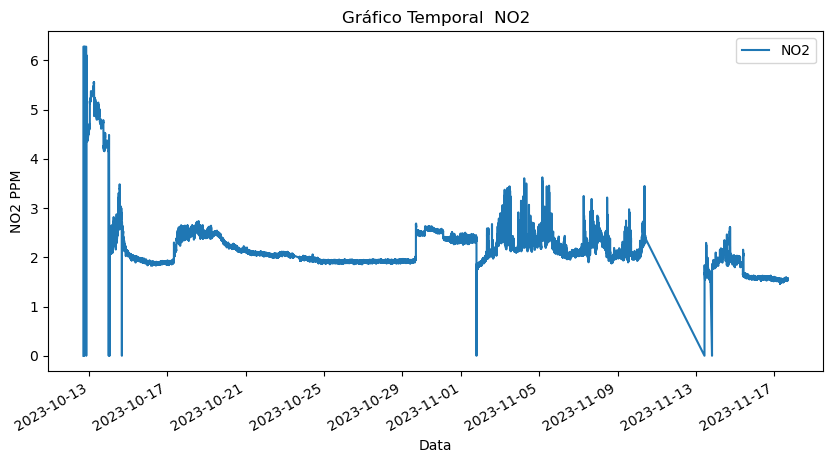

In [19]:
    #Gráfico temporal das grandezas medidas:
    dataset.plot(x ='created_at', y = ['NO2'], title="Gráfico Temporal  NO2", xlabel = "Data", ylabel = "NO2 PPM",figsize = (10,5))

<Axes: title={'center': 'Gráfico Temporal  NH3'}, xlabel='Data', ylabel='NH3 PPM'>

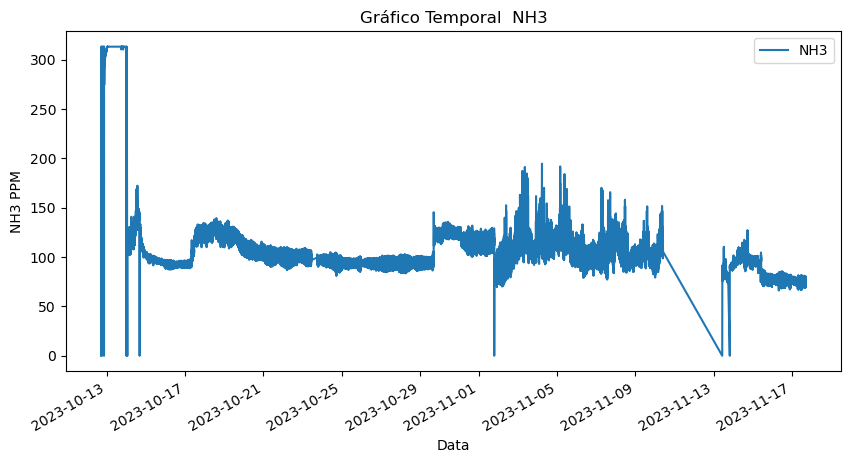

In [20]:
#Gráfico temporal das grandezas medidas:
dataset.plot(x ='created_at', y = ['NH3'], title="Gráfico Temporal  NH3", xlabel = "Data", ylabel = "NH3 PPM",figsize = (10,5))

<Axes: title={'center': 'Gráfico Temporal  CO'}, xlabel='Data', ylabel='CO PPM'>

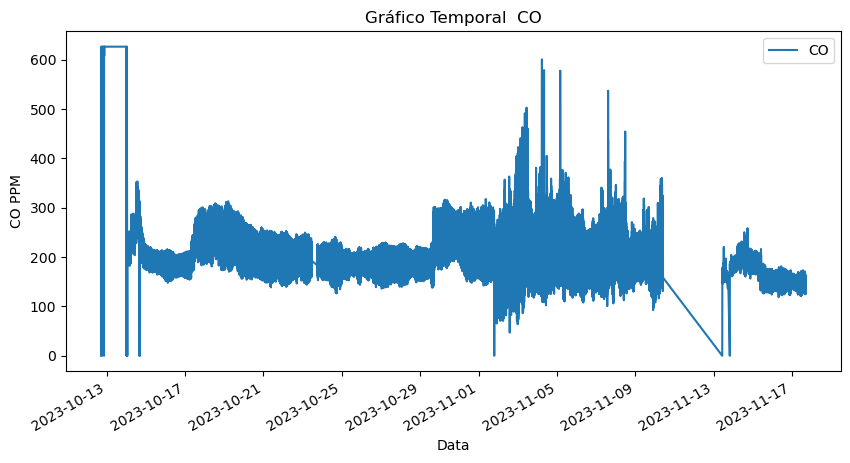

In [21]:
#Gráfico temporal das grandezas medidas:
dataset.plot(x ='created_at', y = ['CO'], title="Gráfico Temporal  CO", xlabel = "Data", ylabel = "CO PPM",figsize = (10,5))

In [22]:
#Média NO2:
dataset["NO2"].mean()


2.2275263365409734

In [23]:
#Média NH3:
dataset["NH3"].mean()


111.73513537664373

In [24]:
#Média CO:
dataset["CO"].mean()

220.7514796982495

In [25]:
# Moda NO2:
dataset["NO2"].mode() 

0    6.27671
Name: NO2, dtype: float64

In [26]:
# Moda NH3:
dataset["NH3"].mode() 

0    313.2742
Name: NH3, dtype: float64

In [27]:
# Moda CO:
dataset["CO"].mode() 

0    626.17419
Name: CO, dtype: float64

In [28]:
# Desvio Padrão NO2:
dataset["NO2"].std()

0.6241904523966934

In [29]:
# Desvio Padrão NH3:
dataset["NH3"].std()

43.1447514476633

In [30]:
# Desvio Padrão CO:
dataset["CO"].std()

91.25362849402818

In [31]:
# Minimo e máximo NO2:
print (dataset["NO2"].min())
print (dataset["NO2"].max())

0.0
6.27671


In [32]:
# Minimo e máximo NH3:
print (dataset["NH3"].min())
print (dataset["NH3"].max())

0.0
313.2742


In [33]:
# Minimo e máximo CO:
print (dataset["CO"].min())
print (dataset["CO"].max())

0.0
626.17419


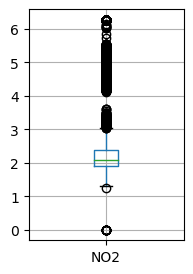

In [34]:
#Vericação de Outliers NO2:
dataset.boxplot(column='NO2',figsize=(2,3),vert=True)
plt.show()

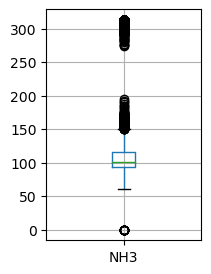

In [35]:
#Vericação de Outliers NH3:
dataset.boxplot(column='NH3',figsize=(2,3),vert=True)
plt.show()

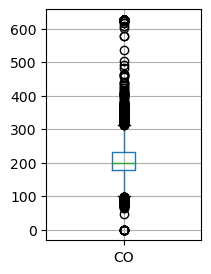

In [36]:
#Vericação de Outliers CO:
dataset.boxplot(column='CO',figsize=(2,3),vert=True)
plt.show()

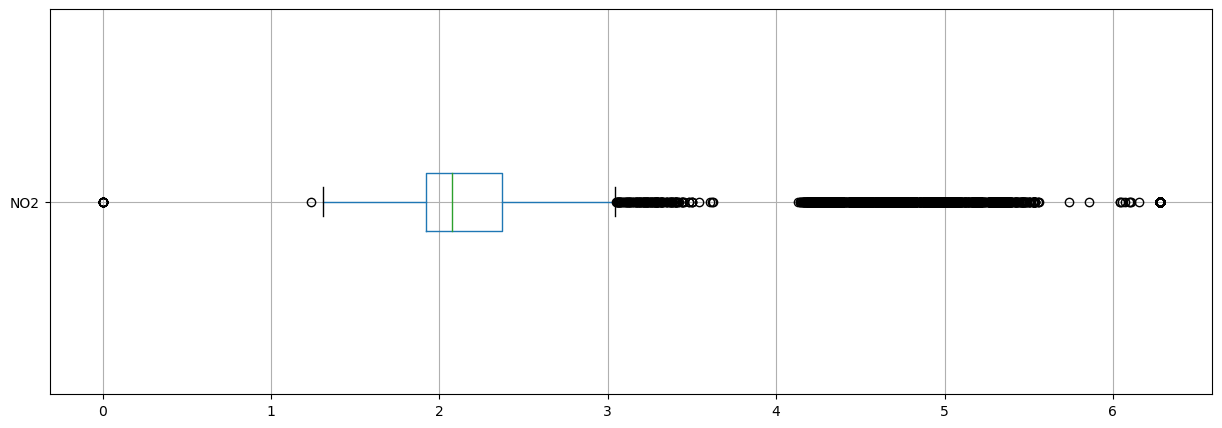

In [37]:
#Removendo os Outliers em NO2: 
limite_superior = 10
limite_inferior = 0.05
dataset_sem_outliers = dataset[dataset['NO2'] <= limite_superior]
dataset_sem_outliers = dataset_sem_outliers[dataset_sem_outliers['NO2'] != limite_inferior]
dataset_sem_outliers.boxplot(column='NO2', figsize=(15, 5), vert=False)
plt.show()

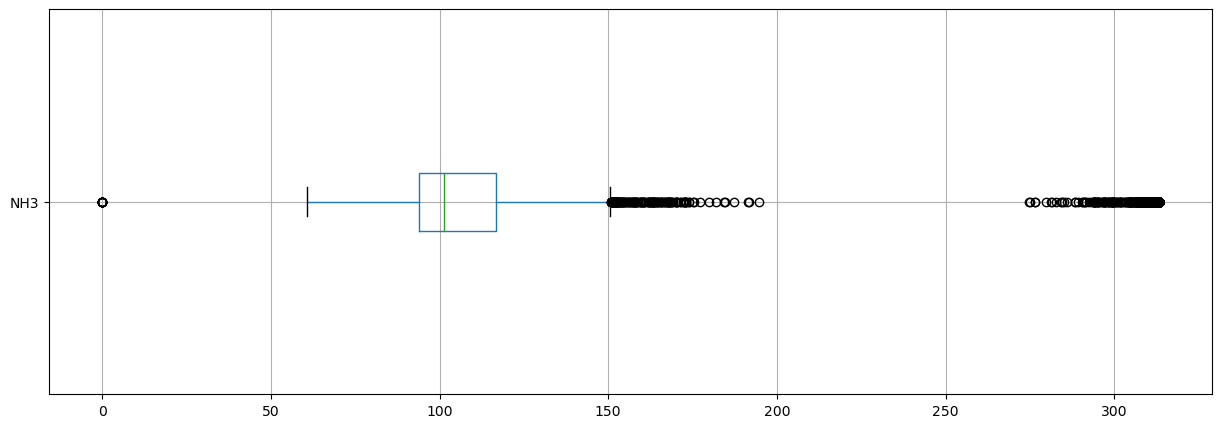

In [38]:
#Removendo os Outliers em NH3: 
limite_superior = 500
limite_inferior = 1
dataset_sem_outliers = dataset[dataset['NH3'] <= limite_superior]
dataset_sem_outliers = dataset_sem_outliers[dataset_sem_outliers['NH3'] != limite_inferior]
dataset_sem_outliers.boxplot(column='NH3', figsize=(15, 5), vert=False)
plt.show()

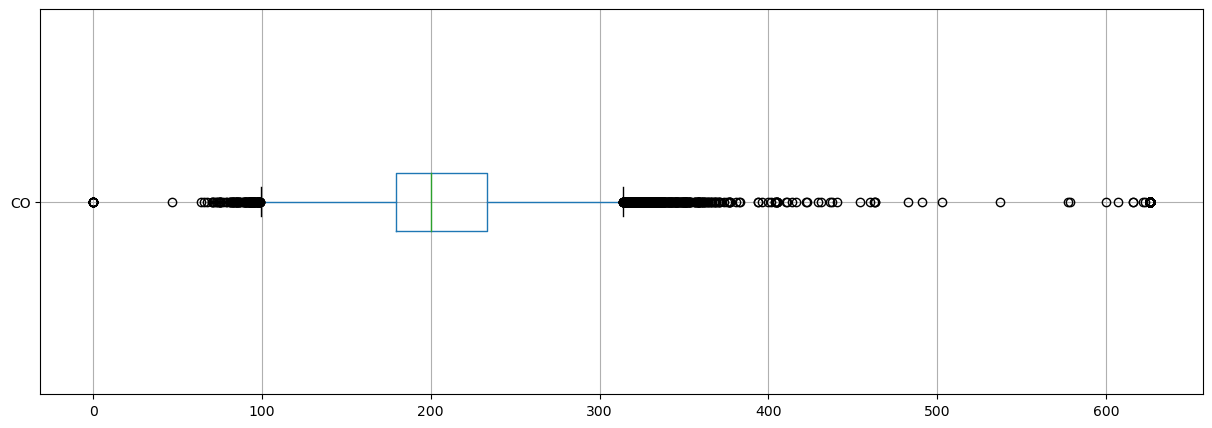

In [39]:
#Removendo os Outliers em CO: 
limite_superior = 1000
limite_inferior = 1
dataset_sem_outliers = dataset[dataset['CO'] <= limite_superior]
dataset_sem_outliers = dataset_sem_outliers[dataset_sem_outliers['CO'] != limite_inferior]
dataset_sem_outliers.boxplot(column='CO', figsize=(15, 5), vert=False)
plt.show()

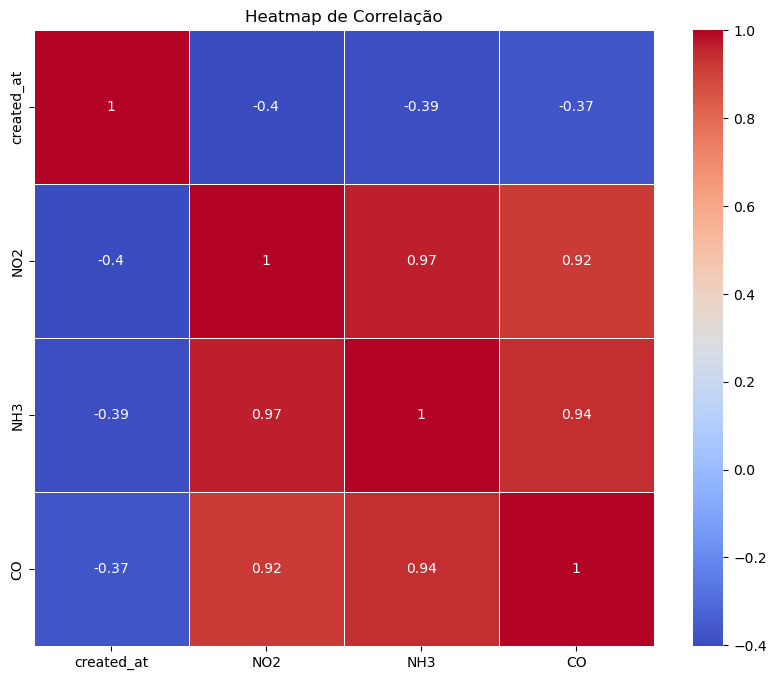

In [40]:
# Construção do heatmap para verificar se existe correlação entre as variaveis:
correlation_matrix = dataset.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap de Correlação')
plt.show()

array([[<Axes: title={'center': 'NO2'}>]], dtype=object)

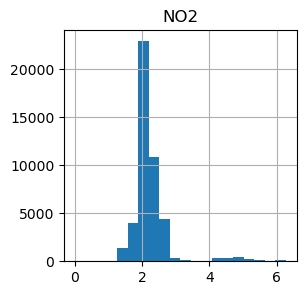

In [41]:
#plotando o histograma de NO2:
dataset.hist(column = 'NO2', figsize=(3,3), bins=20)


array([[<Axes: title={'center': 'NH3'}>]], dtype=object)

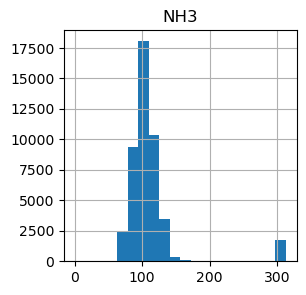

In [42]:
#plotando o histograma de NH3:
dataset.hist(column = 'NH3', figsize=(3,3), bins=20)

array([[<Axes: title={'center': 'CO'}>]], dtype=object)

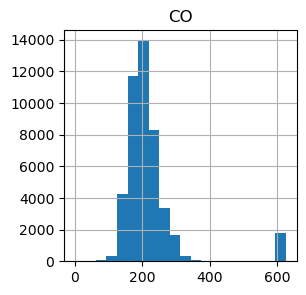

In [43]:
#plotando o histograma de CO:
dataset.hist(column = 'CO', figsize=(3,3), bins=20)


# Random Forest Regressor
Aprendizado de Máquina (NO2)

In [44]:
# Separando os dados:
from sklearn.model_selection import train_test_split

created_at = dataset['created_at']
NO2 = dataset['NO2']

[Data_train, Data_test, NO2_train, NO2_test] = train_test_split(created_at, NO2, test_size=25)


In [45]:
# 1º metodo: RamdomForestRegressor:
from sklearn.ensemble import RandomForestRegressor

# Definindo modelo:
model = RandomForestRegressor()

Data_train = Data_train.array.reshape(-1, 1)
NO2_train = NO2_train.array.reshape(-1, 1)

#Treinando o modelo:
model.fit(Data_train,NO2_train)

c:\Users\lucas\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor()

In [46]:
# score:

print(model.score(Data_train,NO2_train))

0.9938304239564902


In [47]:
# Prevendo valores: 
from sklearn.metrics import mean_squared_error

y_pred = model.predict(Data_test.array.reshape(-1, 1))


mean_squared_error(y_pred, NO2_test)

0.002728089997124277

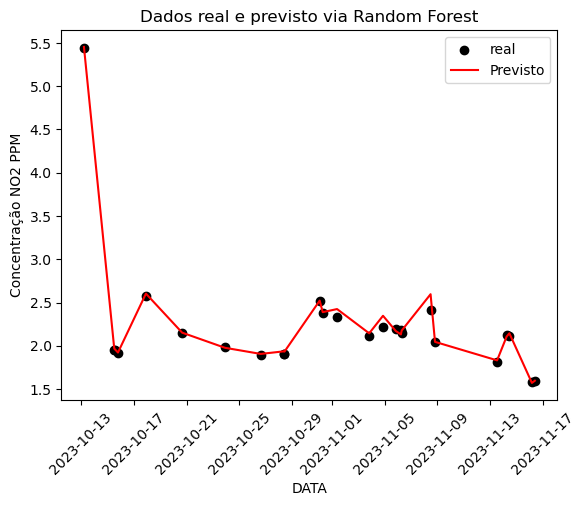

<Figure size 300x300 with 0 Axes>

In [48]:
# Reorganizando os dados em ordem correta:
eixo_x, eixo_y1 = zip(*sorted(zip(Data_test, NO2_test)))
eixo_x, eixo_y2 = zip(*sorted(zip(Data_test, y_pred)))

# Plotando o gráfico: 
plt.title('Dados real e previsto via Random Forest') 
plt.scatter(eixo_x, eixo_y1, color='black')
plt.plot(eixo_x, eixo_y2, color='red')
plt.legend(['real','Previsto'])
plt.xticks(rotation=45)
plt.xlabel('DATA')
plt.ylabel('Concentração NO2 PPM')
# plt.ylim([0, 5])
plt.figure(figsize=(3, 3))
plt.show()

Aprendizado de Máquina (NH3)

In [49]:
# Separando os dados:
from sklearn.model_selection import train_test_split

created_at = dataset['created_at']
NH3 = dataset['NH3']

[Data_train_NH3, Data_test_NH3, NH3_train, NH3_test] = train_test_split(created_at, NH3, test_size=25)

In [50]:
# 1º metodo: RamdomForestRegressor:
from sklearn.ensemble import RandomForestRegressor

# Definindo modelo:
model_NH3 = RandomForestRegressor()

Data_train_NH3 = Data_train_NH3.array.reshape(-1, 1)
NH3_train = NH3_train.array.reshape(-1, 1)

#Treinando o modelo:
model_NH3.fit(Data_train_NH3,NH3_train)

c:\Users\lucas\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor()

In [51]:
# score:

print(model_NH3.score(Data_train_NH3,NH3_train))

0.9903598846253759


In [52]:
# Prevendo valores: 
from sklearn.metrics import mean_squared_error

y_pred_NH3 = model_NH3.predict(Data_test_NH3.array.reshape(-1, 1))

# Calculando erro: 
mean_squared_error(y_pred_NH3, NH3_test)

20.758727192417847

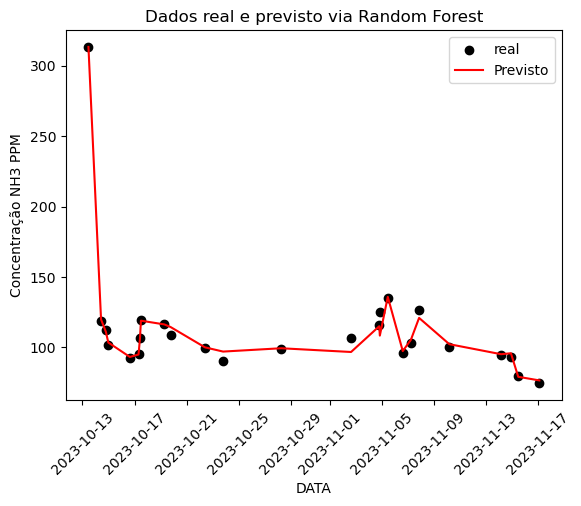

In [53]:
# Reorganizando os dados em ordem correta:
eixo_x_NH3, eixo_y1_NH3 = zip(*sorted(zip(Data_test_NH3, NH3_test)))
eixo_x_NH3, eixo_y2_NH3 = zip(*sorted(zip(Data_test_NH3, y_pred_NH3)))

# Plotando o gráfico: 
plt.title('Dados real e previsto via Random Forest') 
plt.scatter(eixo_x_NH3, eixo_y1_NH3, color='black')
plt.plot(eixo_x_NH3, eixo_y2_NH3, color='red')
plt.legend(['real','Previsto'])
plt.xticks(rotation=45)
plt.xlabel('DATA')
plt.ylabel('Concentração NH3 PPM')
# plt.ylim([0, 5])
plt.show()

Aprendizado de Máquina (CO):

In [54]:
# Separando os dados:
from sklearn.model_selection import train_test_split

created_at_CO = dataset['created_at']
CO = dataset['CO']

[Data_train_CO, Data_test_CO, CO_train, CO_test] = train_test_split(created_at_CO, CO, test_size=25)

In [55]:
# 1º metodo: RamdomForestRegressor:
from sklearn.ensemble import RandomForestRegressor

# Definindo modelo:
model_CO = RandomForestRegressor()

Data_train_CO = Data_train_CO.array.reshape(-1, 1)
CO_train = CO_train.array.reshape(-1, 1)

#Treinando o modelo:
model_CO.fit(Data_train_CO,CO_train)

c:\Users\lucas\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor()

In [56]:
print(model_CO.score(Data_train_CO,CO_train))

0.9392320851110324


In [57]:
# Prevendo valores: 
from sklearn.metrics import mean_squared_error

y_pred_CO = model_CO.predict(Data_test_CO.array.reshape(-1, 1))

# Calculando erro: 
mean_squared_error(y_pred_CO, CO_test)

906.5819520437569

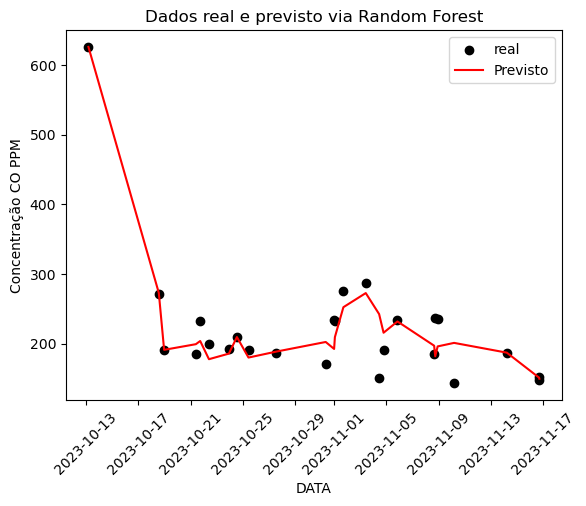

In [58]:
# Reorganizando os dados em ordem correta:
eixo_x_CO, eixo_y1_CO = zip(*sorted(zip(Data_test_CO, CO_test)))
eixo_x_CO, eixo_y2_CO = zip(*sorted(zip(Data_test_CO, y_pred_CO)))

# Plotando o gráfico: 
plt.title('Dados real e previsto via Random Forest') 
plt.scatter(eixo_x_CO, eixo_y1_CO, color='black')
plt.plot(eixo_x_CO, eixo_y2_CO, color='red')
plt.legend(['real','Previsto'])
plt.xticks(rotation=45)
plt.xlabel('DATA')
plt.ylabel('Concentração CO PPM')
# plt.ylim([0, 5])
plt.show()

# Multi-layer Perceptron - Descartado
Aprendizado de máquina


In [59]:
# Importando bibliotecas:
from sklearn.neural_network import MLPRegressor


In [60]:
# Separando dados de treino e teste: 

created_at2 =  dataset['created_at'].astype(np.int64)
NO22 = dataset['NO2']

[Data2_train, Data2_test, NO22_train, NO22_test] = train_test_split(created_at2, NO22, test_size=25)

In [61]:
# Treinando o algoritmo: 
regr = MLPRegressor(random_state=1, max_iter=20000, hidden_layer_sizes = [2, 2, 2, 2], alpha = 0.2).fit(Data2_train.array.reshape(-1, 1), NO22_train.array.reshape(-1, 1))

c:\Users\lucas\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1625: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [62]:
#Prevendo e medindo o score: 
NO22_prev = regr.predict(Data2_test.array.reshape(-1, 1))
regr.score(Data2_test.array.reshape(-1, 1),NO22_test.array.reshape(-1, 1))



-0.06358650908444607

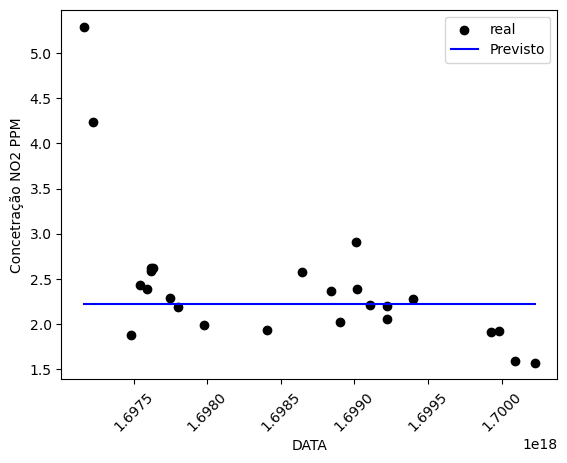

In [63]:
# Reorganizando os dados em ordem correta:
eixo_xx, eixo_y11 = zip(*sorted(zip(Data2_test, NO22_test)))
eixo_xx, eixo_y21 = zip(*sorted(zip(Data2_test, NO22_prev)))

# Plotando o gráfico: 
plt.scatter(eixo_xx, eixo_y11, color='black')
plt.plot(eixo_xx, eixo_y21, color='blue')
plt.legend(['real','Previsto'])
plt.xticks(rotation=45)
plt.xlabel('DATA')
plt.ylabel('Concetração NO2 PPM')
# plt.ylim([0, 5])
plt.show()

# K Nearest Neighbor Regression - KNNP
Aprendizado de máquina (NO2)

In [64]:
# Importando bibliotecas: 

from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error


In [65]:
# Separando os dados: 

created_at3 = dataset['created_at']
NO23 = dataset['NO2']

[Data3_train, Data3_test, NO23_train, NO23_test] = train_test_split(created_at3, NO23, test_size=25)

Data3_train = Data3_train.array.reshape(-1, 1)
Data3_test = Data3_test.array.reshape(-1, 1)
NO23_train = NO23_train.array.reshape(-1, 1)
NO23_test = NO23_test.array.reshape(-1, 1)

In [66]:
# Definindo o numero de vizinhos próximos: 

clf =KNeighborsRegressor(11)
clf.fit(Data3_train, NO23_train)

KNeighborsRegressor(n_neighbors=11)

In [67]:
# prevendo dados: 
NO23_prev = clf.predict(Data3_test)

# Calculando o score:
clf.score(Data3_test,NO23_test)

# Calculando a acurácia:
print(mean_squared_error(NO23_test,NO23_prev))


0.0006751356555702467


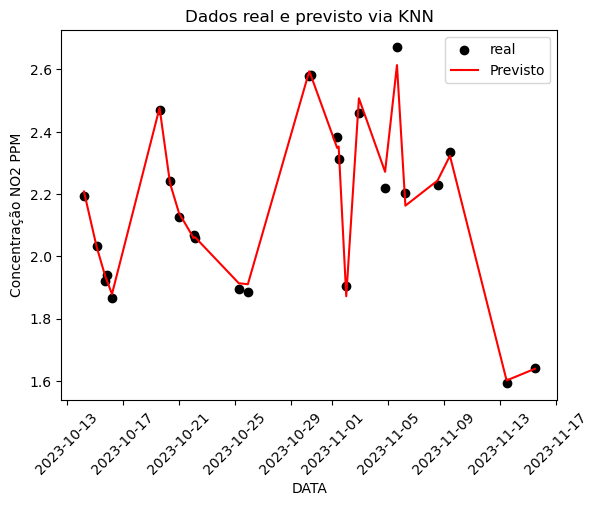

In [68]:
# Plotando o resultado: 

# Reorganizando os dados em ordem correta:
eixo_xxx, eixo_y3 = zip(*sorted(zip(Data3_test, NO23_test)))
eixo_xxx, eixo_y4 = zip(*sorted(zip(Data3_test, NO23_prev)))

# Plotando o gráfico:
plt.title('Dados real e previsto via KNN') 
plt.scatter(eixo_xxx, eixo_y3, color='black')
plt.plot(eixo_xxx, eixo_y4, color='red')
plt.legend(['real','Previsto'])
plt.xticks(rotation=45)
plt.xlabel('DATA')
plt.ylabel('Concentração NO2 PPM')
# plt.ylim([0, 5])
plt.show()

Aprendizado de Máquina (NH3)

In [69]:
# Separando os dados: 

created_NH32 = dataset['created_at']
NH32 = dataset['NH3']

[DataNH32_train, DataNH32_test, NNH32_train, NH32_test] = train_test_split(created_NH32, NH32, test_size=25)

DataNH32_train = DataNH32_train.array.reshape(-1, 1)
DataNH32_test = DataNH32_test.array.reshape(-1, 1)
NH32_train = NNH32_train.array.reshape(-1, 1)
NH32_test = NH32_test.array.reshape(-1, 1)

In [70]:
# Definindo o numero de vizinhos próximos: 

clf_NH32 =KNeighborsRegressor(11)
clf_NH32.fit(DataNH32_train, NH32_train)

KNeighborsRegressor(n_neighbors=11)

In [71]:
# prevendo dados: 
NH32_prev = clf_NH32.predict(DataNH32_test)

# # Calculando o score:
# clf_NH32.score(DataNH32_test,NH32_test)

# Calculando a acurácia:
print(mean_squared_error(NH32_test,NH32_prev))

15.065022488915854


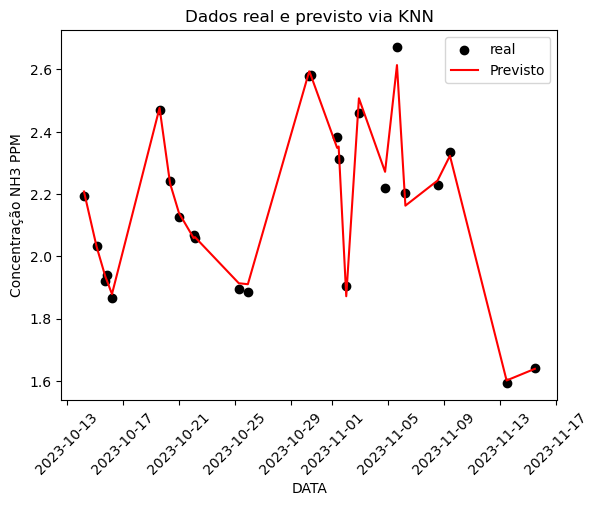

In [72]:
# Plotando o resultado: 

# Reorganizando os dados em ordem correta:
eixo_xxx_NH32, eixo_y3__NH32 = zip(*sorted(zip(DataNH32_test, NH32_test)))
eixo_xxx_NH32, eixo_y4__NH32 = zip(*sorted(zip(DataNH32_test, NH32_prev)))

# Plotando o gráfico:
plt.title('Dados real e previsto via KNN') 
plt.scatter(eixo_xxx, eixo_y3, color='black')
plt.plot(eixo_xxx, eixo_y4, color='red')
plt.legend(['real','Previsto'])
plt.xticks(rotation=45)
plt.xlabel('DATA')
plt.ylabel('Concentração NH3 PPM')
# plt.ylim([0, 5])
plt.show()

Aprendizado de Máquina (CO)

In [73]:
# Separando os dados: 

created_COO = dataset['created_at']
COO = dataset['CO']

[Data_train_COO, Data_test_COO, COO_train, COO_test] = train_test_split(created_COO, COO, test_size=25)

Data_train_COO = Data_train_COO.array.reshape(-1, 1)
Data_test_COO = Data_test_COO.array.reshape(-1, 1)
COO_train = COO_train.array.reshape(-1, 1)
COO_test = COO_test.array.reshape(-1, 1)

In [74]:
# Definindo o numero de vizinhos próximos: 

clf_COO =KNeighborsRegressor(11)
clf_COO.fit(Data_train_COO, COO_train)

KNeighborsRegressor(n_neighbors=11)

In [75]:
# prevendo dados: 
COO_prev = clf_COO.predict(Data_test_COO)

# Calculando o score:
clf_COO.score(Data_test_COO,COO_test)

# # Calculando a acurácia:
# print(mean_squared_error(COO_test,COO_prev))

0.280393166605138

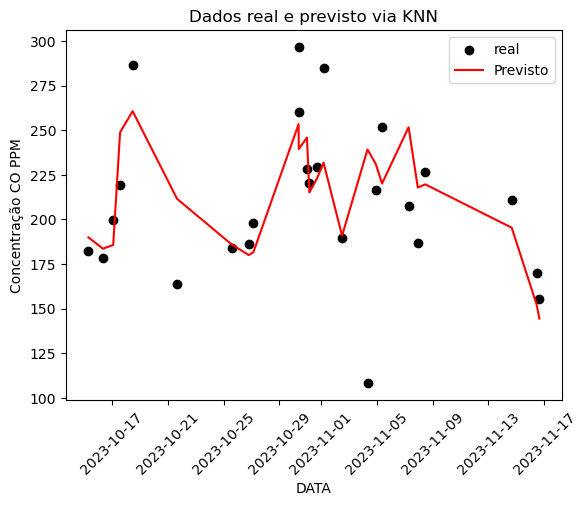

In [76]:
# Plotando o resultado: 

# Reorganizando os dados em ordem correta:
eixo_xxx_COO, eixo_y3_COO = zip(*sorted(zip(Data_test_COO, COO_test)))
eixo_xxx_COO, eixo_y4_COO = zip(*sorted(zip(Data_test_COO, COO_prev)))

# Plotando o gráfico:
plt.title('Dados real e previsto via KNN') 
plt.scatter(eixo_xxx_COO, eixo_y3_COO, color='black')
plt.plot(eixo_xxx_COO, eixo_y4_COO, color='red')
plt.legend(['real','Previsto'])
plt.xticks(rotation=45)
plt.xlabel('DATA')
plt.ylabel('Concentração CO PPM')
# plt.ylim([0, 5])
plt.show()

# Suport Vector Machines (SVM) - Regression
Aprendizado de máquina (NO2)

In [77]:
# Importando bibliotecas: 

from sklearn import svm
from sklearn.metrics import mean_squared_error

In [78]:
# Separando os dados de traino e teste: 

created_at4 = dataset['created_at']
NO24 = dataset['NO2']

[Data4_train, Data4_test, NO24_train, NO24_test] = train_test_split(created_at4, NO24, test_size=25)

Data4_train = Data4_train.array.reshape(-1, 1)
Data4_test = Data4_test.array.reshape(-1, 1)
NO24_train = NO24_train.array.reshape(-1, 1)
NO24_test = NO24_test.array.reshape(-1, 1)

In [79]:
# Criando e treinando o modelo: 

svm_regr = svm.SVR()
svm_regr.fit(Data4_train,NO24_train)

c:\Users\lucas\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [90]:
# Prevendo valores: 
NO24_prev = svm_regr.predict(Data4_test)

# # Calculando o score:
# print(svm_regr.score(Data4_test,NO24_test))

# Calculando a acurácia:
print(mean_squared_error(NO24_test,NO24_prev))



0.09189925028399434


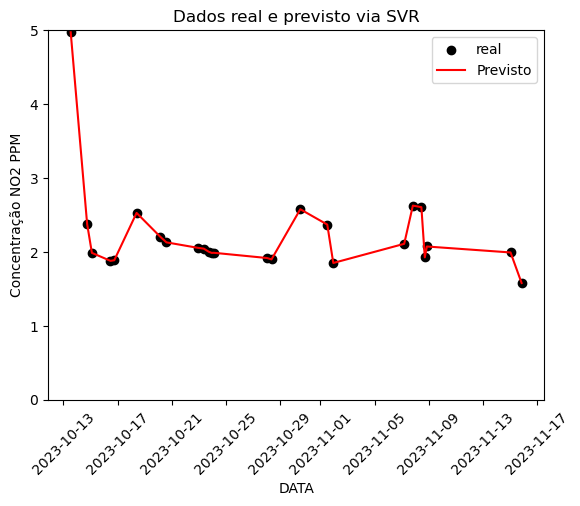

In [81]:
# Plotando o gráfico: 

# Reorganizando os dados em ordem correta:
eixo_xxxx, eixo_y4 = zip(*sorted(zip(Data4_test, NO24_test)))
eixo_xxxx, eixo_y5 = zip(*sorted(zip(Data4_test, NO24_prev)))

# Plotando o gráfico: 
plt.title('Dados real e previsto via SVR')
plt.scatter(eixo_xxxx, eixo_y4, color='black')
plt.plot(eixo_xxxx, eixo_y4, color='red')
plt.legend(['real','Previsto'])
plt.xticks(rotation=45)
plt.xlabel('DATA')
plt.ylabel('Concentração NO2 PPM')
plt.ylim([0, 5])
plt.show()

Aprendizado de Máquina (NH3)

In [82]:
# Separando os dados de traino e teste: 

created_NH33 = dataset['created_at']
NH33 = dataset['NH3']

[Data_train_NH33, Data_test_NH33, NH33_train, NH33_test] = train_test_split(created_NH33, NH33, test_size=25)

Data_train_NH33 = Data_train_NH33.array.reshape(-1, 1)
Data_test_NH33 = Data_test_NH33.array.reshape(-1, 1)
NH33_train = NH33_train.array.reshape(-1, 1)
NH33_test = NH33_test.array.reshape(-1, 1)

In [83]:
# Criando e treinando o modelo: 

svm_regr_NH33 = svm.SVR()
svm_regr_NH33.fit(Data_train_NH33,NH33_train)

c:\Users\lucas\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [91]:
# Prevendo valores: 
NH33_prev = svm_regr_NH33.predict(Data_test_NH33)

# # Calculando o score:
# print(svm_regr_NH33.score(Data_test_NH33,NH33_test))

# Calculando a acurácia:
print(mean_squared_error(NH33_test,NH33_prev))

2640.8853902530695


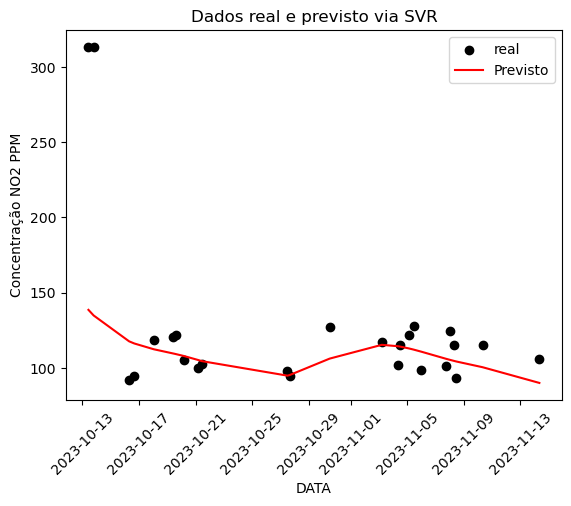

In [85]:
# Plotando o gráfico: 

# Reorganizando os dados em ordem correta:
eixo_xxxx_NH33, eixo_y4_NH33 = zip(*sorted(zip(Data_test_NH33, NH33_test)))
eixo_xxxx_NH33, eixo_y5_NH33 = zip(*sorted(zip(Data_test_NH33, NH33_prev)))

# Plotando o gráfico: 
plt.title('Dados real e previsto via SVR')
plt.scatter(eixo_xxxx_NH33, eixo_y4_NH33, color='black')
plt.plot(eixo_xxxx_NH33, eixo_y5_NH33, color='red')
plt.legend(['real','Previsto'])
plt.xticks(rotation=45)
plt.xlabel('DATA')
plt.ylabel('Concentração NO2 PPM')
# plt.ylim([0, 5])
plt.show()

Aprendizado de Máquina (CO)

In [86]:
# Separando os dados de traino e teste: 

created_COOO = dataset['created_at']
COOO = dataset['CO']

[Data_train_COOO, Data_test_COOO, COOO_train, COOO_test] = train_test_split(created_COOO, COOO, test_size=25)

Data_train_COOO = Data_train_COOO.array.reshape(-1, 1)
Data_test_COOO = Data_test_COOO.array.reshape(-1, 1)
COOO_train = COOO_train.array.reshape(-1, 1)
COOO_test = COOO_test.array.reshape(-1, 1)

In [87]:
# Criando e treinando o modelo: 

svm_regr_COOO = svm.SVR()
svm_regr_COOO.fit(Data_train_COOO,COOO_train)

c:\Users\lucas\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [92]:
# Prevendo valores: 
COOO_prev = svm_regr_COOO.predict(Data_test_COOO)

# # Calculando o score:
# print(svm_regr_COOO.score(Data_test_COOO,COOO_test))

# Calculando a acurácia:
print(mean_squared_error(COOO_test,COOO_prev))

6699.021730882118


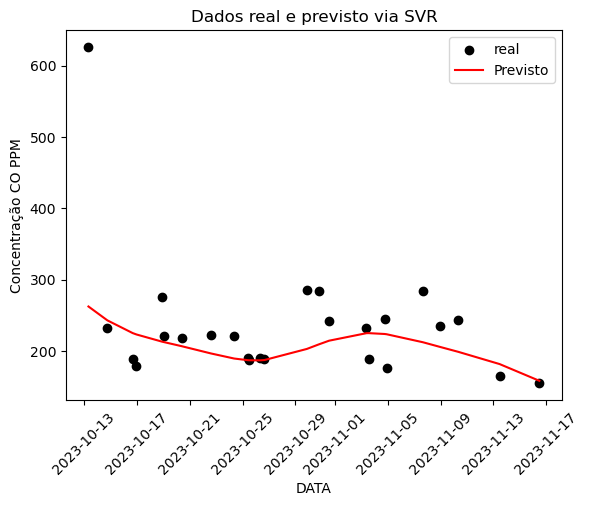

In [89]:
# Plotando o gráfico: 

# Reorganizando os dados em ordem correta:
eixo_xxxx_COOO, eixo_y4_COOO = zip(*sorted(zip(Data_test_COOO, COOO_test)))
eixo_xxxx_NH33, eixo_y5_COOO = zip(*sorted(zip(Data_test_COOO, COOO_prev)))

# Plotando o gráfico: 
plt.title('Dados real e previsto via SVR')
plt.scatter(eixo_xxxx_COOO, eixo_y4_COOO, color='black')
plt.plot(eixo_xxxx_COOO, eixo_y5_COOO, color='red')
plt.legend(['real','Previsto'])
plt.xticks(rotation=45)
plt.xlabel('DATA')
plt.ylabel('Concentração CO PPM')
# plt.ylim([0, 5])
plt.show()